# 决策树
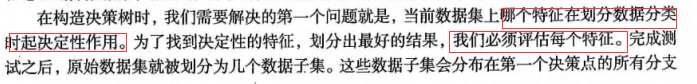
信息熵（香农熵）： 是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低。例如：火柴有序放在火柴盒里，熵值很低，相
反，熵值很高。

信息增益： 在划分数据集前后信息发生的变化称为信息增益

## 开发流程
收集数据：可以使用任何方法。

准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化。

分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期。
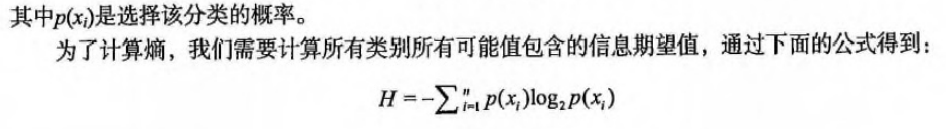

训练算法：构造树的数据结构。

测试算法：使用经验树计算错误率。（经验树没有搜索到较好的资料，有兴趣的同学可以来补充）

使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

# 算法特点
优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。

缺点：可能会产生过度匹配问题。

适用数据类型：数值型和标称

In [19]:
import operator
from math import log
import decisionTreePlot as dtPlot

In [3]:
def createDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]
    labels = ['no surfacing','flippers']
    
    return dataSet, labels

In [4]:
#香农熵
def calcShannonEnt(dataSet):
    #数据量计算
    numEntries = len(dataSet)
    #label 出现次数计算
    labelCounts = {}
    for featVec in dataSet:
        #dataset每行最后一个data是label
        currentLabel = featVec[-1]
        #currentlabel not in 键,默认给以0
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        #labelcounts字典统计
        labelCounts[currentLabel] += 1
    #print labelCounts.keys()     
    
    #label香农熵的计算
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        #print prob
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [5]:
#按照给定特征划分数据集(对每个特征划分数据集的结果计算一次信息熵，然后判断按照哪个特征划分数据集是最好的划分方式)
def splitDataSet(dataSet, index, value):
    #传入三个参数第一个参数是我们的数据集，是一个链表形式的数据集；第二个参数是我们的要依据某个特征来划分数据集
    '''
    splitDataSet(通过遍历dataSet数据集,依据index列进行分类，求出index对应的colnum列的值为value的行
    如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中)
    '''
    retDataSet = []
    for featVec in dataSet:
        #dataset[0]?in dataset & dataset[0][index] ?== value
        if featVec[index] == value:#如果某个特征和我们指定的特征值相等
            #除去这个特征然后创建一个子特征
            reducedFeatVec = featVec[:index]
            reducedFeatVec.extend(featVec[index+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

划分数据集的方式我们首先选取第一个特征的第一个可能取值来筛选信息。然后再选取第一个特征的第二个可能的取值来划分我们的信息。之后我们再选取第二个特征的第一个可能的取值来划分数据集，以此类推。

e.g:
[[1, 1, ‘yes’], [1, 1, ‘yes’], [1, 0, ‘no’], [0, 1, ‘no’], [0, 1, ‘no’]]
这个是我们的数据集。
如果我们选取第一个特征值也就是需不需要浮到水面上才能生存来划分我们的数据，这里生物有两种可能，1就是需要，0就是不需要。那么第一个特征的取值就是两种。

如果我们按照第一个特征的第一个可能的取值来划分数据也就是当所有的样本的第一列取1的时候满足的样本，那就是如下三个：
[1, 1, ‘yes’], [1, 1, ‘yes’], [1, 0, ‘no’]
可以理解为这个特征为一条分界线，**我们选取完这个特征之后这个特征就要从我们数据集中剔除，因为要把他理解为分界线。**那么划分好的数据就是：

    [[1, ‘yes’], [1, ‘yes’], [0, ‘no’]]

如果我们以第一个特征的第二个取值来划分数据集，也就是当所有样本的第二列取1的时候满足的样本，那么就是

    [[1, 1, ‘yes’], [1, 1, ‘yes’], [0, 1, ‘no’], [0, 1, ‘no’]]
    那么得到的数据子集就是下面这个样子：
    [[1,’yes’],[1,’yes’],[1, ‘no’], [1, ‘no’]]


In [6]:
#根据增益选择最好特征
def chooseBestFeatureToSplit(dataSet):
    #get features ,out labels
    numFeatures = len(dataSet[0]) - 1
    #label 的香农熵
    baseEntropy = calcShannonEnt(dataSet)
    #初始化最优信息熵增益&最优feature编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        #get uniquevals feature
        uniqueVals = set(featList)
        newEntropy = 0.0
        #iterate all the unique feature
        for value in uniqueVals:
            #对每个唯一属性划分一次数据集,计算数据集new香农熵,并对所有唯一特征值得到的熵求和
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            #计算增益
            newEntropy += prob * calcShannonEnt(subDataSet)
        #获取最大信息增益
        infoGain = baseEntropy - newEntropy
        print 'infoGain=', infoGain,'bestFeature',i, baseEntropy, newEntropy
        if(infoGain>bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [7]:
#选择出现次数最多的一个结果
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 倒叙排列classCount得到一个字典集合，然后取出第一个就是结果（yes/no），即出现次数最多的结果
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]

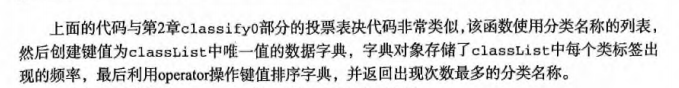



        得到原始数据集，然后基于最好的属性值划分数据集。每一次划分数据集，我们都要消耗一个特征，根据某个特征将某些性质相同的元素剥离出来
        划分数据的时候我们根据香农熵，计算信息增益之后找到最好的属性值进行数据的划分。
        
        由于特征值可能有多于两个的，因此可能存在大于两个分支的数据集划分
        
        第一次划分数据将向下传递到树分支的下一个节点，在这个节点上，我们可以再次划分数据集，因此我们可以采用递归的原则来处理数据集。
        
        我们都知道递归必须要有一个终止条件,1)如果程序已经遍历完了所有的特征属性,2)或者每个分支下的所有实例都具有相同的分类,我们得到一个叶子节点或者终止块.这个就是我们递归的终止条件.



In [8]:
def createTree(dataSet, labels):
    #在createtree函数中,我们在create之前先做几个tree检查,再做一般化的操作
    
    #这里的第一条语句就是获得dataSet中的所有数据的feature:
    classList = [example[-1] for example in dataSet]
    #之后的两个if条件是递归终止条件:
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #上面的这个if语句是说表示所有的数据都已经划分完成,每个feature已经完全相同,这样递归可以结束count first feature times = dataset feature times
    #下面的这个if语句是说表示的使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。只剩最后一列.
    #因为决策树算法每做一次信息的划分,都会消耗一个特征,当特征消耗完之后还有类别不同那么我们就需要投票表决了
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    #接下来是一般化的情况
    # 返回最好的特征值，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称, bestFeat 存储的最好的特征的下标
    # bestFeatLabel中存储了最佳特征的标签
    bestFeatLabel = labels[bestFeat]
    #初始化tree
    myTree = {bestFeatLabel: {}}
    # 删除最佳特征值
    del(labels[bestFeat])
    # 找出最佳特征向量对应的所有特征值
    featValues = [example[bestFeat] for example in dataSet]
    #去除重复的特征值
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        print 'myTree', value, myTree
    return myTree

In [9]:
#mydat,labels = createDataSet()
#mydat,labels

([[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']],
 ['no surfacing', 'flippers'])

In [10]:
#bestFeature = chooseBestFeatureToSplit(mydat)
#bestFeature

infoGain= 0.419973094022 bestFeature 0 0.970950594455 0.550977500433
infoGain= 0.170950594455 bestFeature 1 0.970950594455 0.8


0

In [11]:
#myterr=createTree(mydat,labels)

infoGain= 0.419973094022 bestFeature 0 0.970950594455 0.550977500433
infoGain= 0.170950594455 bestFeature 1 0.970950594455 0.8
myTree 0 {'no surfacing': {0: 'no'}}
infoGain= 0.918295834054 bestFeature 0 0.918295834054 0.0
myTree 0 {'flippers': {0: 'no'}}
myTree 1 {'flippers': {0: 'no', 1: 'yes'}}
myTree 1 {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [12]:
#测试算法:使用决策树执行分类
def classify(inputTree, featLabels,testVec):
    '''
    Args:
        inputTree  决策树文件名
        featLabels 分类标签集
        testVec    待分类对象
    Returns:
        classLabel 分类的结果值，需要映射label才能知道名称
    '''
    #当前分类标签
    #获取tree根节点的key
    firstStr = inputTree.keys()[0]
    print firstStr
    #获取key的value
    secondDict = inputTree[firstStr]
    print secondDict
    
    #使用index找到当前分类标签在分类标签集中的下标
    featIndex = featLabels.index(firstStr)
    #测试data,获取待分类对象中当前分类的特征值
    key = testVec[featIndex]
    
    #遍历
    valueOfFeat = secondDict[key]
    print '+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        #子树分支则递归
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        # 叶子分支则返回结果
        classLabel = valueOfFeat
    return classLabel

In [39]:
#使用pickle模块存储决策树
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree, fw)
    fw.close()
    print 'store success'
    
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [24]:
def fishTest():
    # 1.创建数据和结果标签
    myDat, labels = createDataSet()
    print '创建数据和结果标签'
    print myDat, labels

    # 计算label分类标签的香农熵
    print '计算label分类标签的香农熵'
    calcShannonEnt(myDat)

    # # 求第0列 为 1/0的列的数据集【排除第0列】
    print '1---', splitDataSet(myDat, 0, 1)
    print '0---', splitDataSet(myDat, 0, 0)

    # # 计算最好的信息增益的列
    print '计算最好的信息增益的列'
    print chooseBestFeatureToSplit(myDat)

    import copy
    myTree = createTree(myDat, copy.deepcopy(labels))
    print myTree
    # [1, 1]表示要取的分支上的节点位置，对应的结果值
    print classify(myTree, labels, [1, 1])

    # 画图可视化展现
    dtPlot.createPlot(myTree)

创建数据和结果标签
[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] ['no surfacing', 'flippers']
计算label分类标签的香农熵
1--- [[1, 'yes'], [1, 'yes'], [0, 'no']]
0--- [[1, 'no'], [1, 'no']]
计算最好的信息增益的列
infoGain= 0.419973094022 bestFeature 0 0.970950594455 0.550977500433
infoGain= 0.170950594455 bestFeature 1 0.970950594455 0.8
0
infoGain= 0.419973094022 bestFeature 0 0.970950594455 0.550977500433
infoGain= 0.170950594455 bestFeature 1 0.970950594455 0.8
myTree 0 {'no surfacing': {0: 'no'}}
infoGain= 0.918295834054 bestFeature 0 0.918295834054 0.0
myTree 0 {'flippers': {0: 'no'}}
myTree 1 {'flippers': {0: 'no', 1: 'yes'}}
myTree 1 {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
no surfacing
{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
flippers
{0: 'no', 1: 'yes'}
+++ flippers xxx {0:

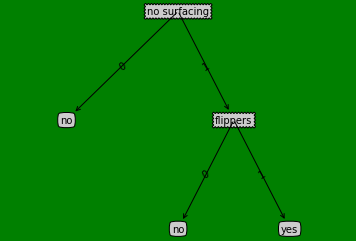

In [25]:
fishTest()

# 隐形眼镜

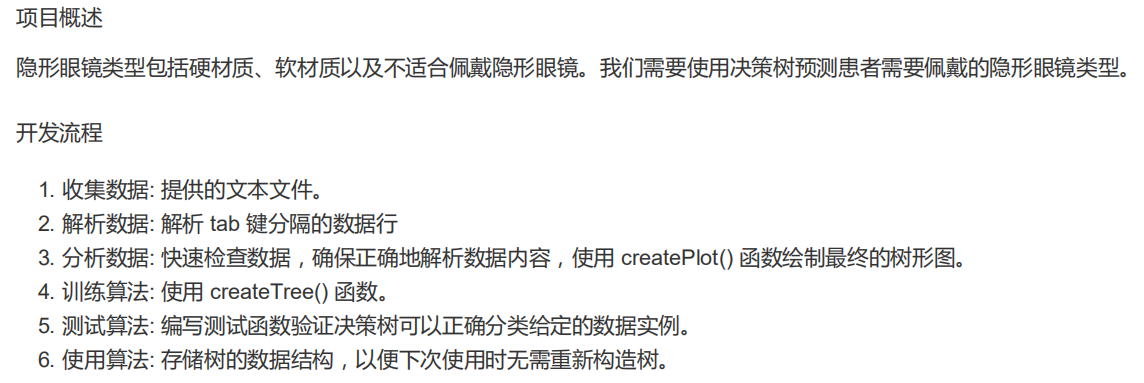

In [40]:
def ContactLensesTest():
    """
    Desc:
        预测隐形眼镜的测试代码
    Args:
        none
    Returns:
        none
    """

    # 加载隐形眼镜相关的 文本文件 数据
    fr = open('lenses.txt')
    # 解析数据，解析tab分割的数据行，获得 features 数据
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    # 得到数据的对应的 Labels
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    # 使用上面的创建决策树的代码，构造预测隐形眼镜的决策树
    lensesTree = createTree(lenses, lensesLabels)
    storeTree(lensesTree, 'mylensestree.txt')
    print lensesTree
    # 画图可视化展现
    dtPlot.createPlot(lensesTree)

infoGain= 0.0393965036461 bestFeature 0 1.32608752536 1.28669102172
infoGain= 0.0395108354236 bestFeature 1 1.32608752536 1.28657668994
infoGain= 0.377005230011 bestFeature 2 1.32608752536 0.949082295353
infoGain= 0.548794940695 bestFeature 3 1.32608752536 0.777292584669
myTree reduced {'tearRate': {'reduced': 'no lenses'}}
infoGain= 0.221251836004 bestFeature 0 1.55458516934 1.33333333333
infoGain= 0.0954372523106 bestFeature 1 1.55458516934 1.45914791703
infoGain= 0.770426041486 bestFeature 2 1.55458516934 0.784159127851
infoGain= 0.251629167388 bestFeature 0 0.918295834054 0.666666666667
infoGain= 0.459147917027 bestFeature 1 0.918295834054 0.459147917027
infoGain= 0.918295834054 bestFeature 0 0.918295834054 0.0
myTree pre {'age': {'pre': 'no lenses'}}
myTree presbyopic {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses'}}
myTree young {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}
myTree hyper {'prescript': {'hyper': {'age': {'pre': 'no lenses', 'presb

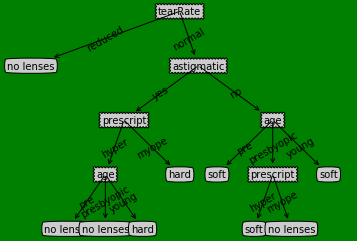

In [41]:
lensestree = ContactLensesTest()

In [42]:
grabTree('mylensestree.txt')

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}